In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import classification_report

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
# Loading Dataset
df = pd.read_csv("../data/telescope_data.csv").drop('Unnamed: 0' , axis = 1)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
# prediction label "class" 
df["class"].unique()

array(['g', 'h'], dtype=object)

In [7]:
# label encoding "class"
df["class"] = (df["class"] == "g").astype(int)

In [8]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

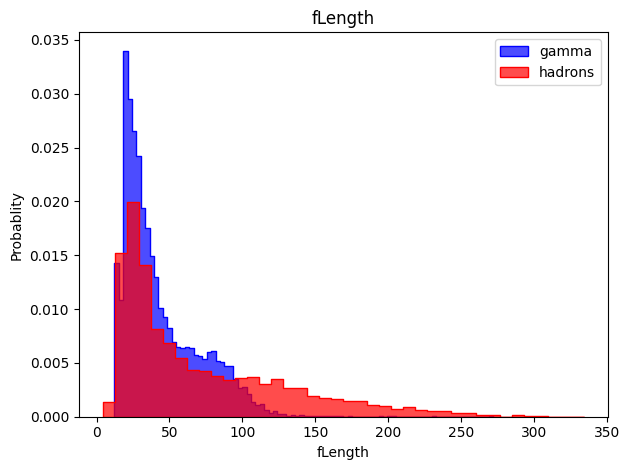

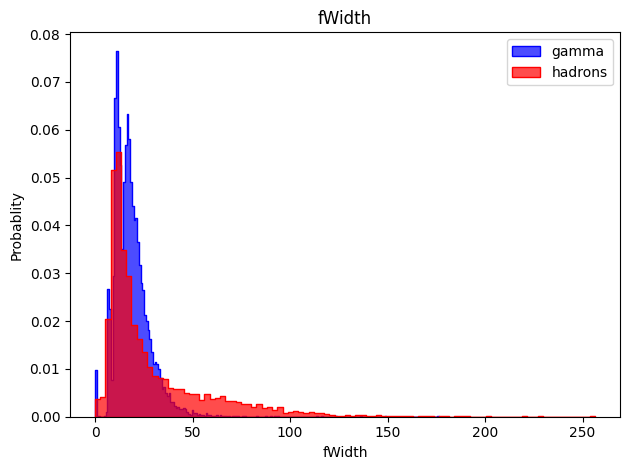

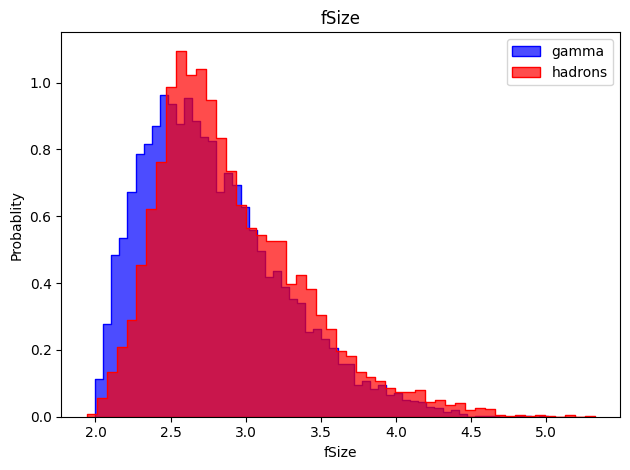

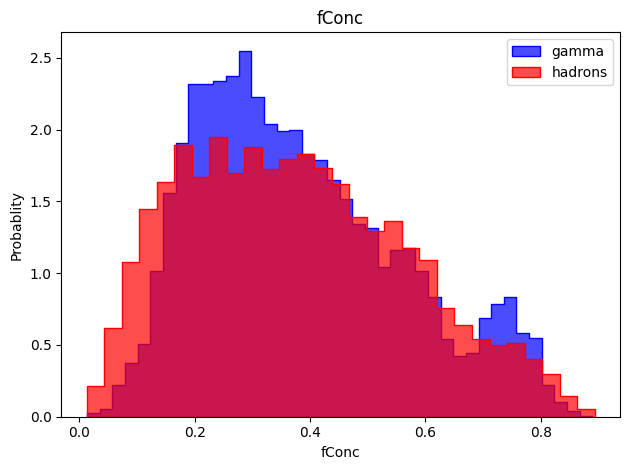

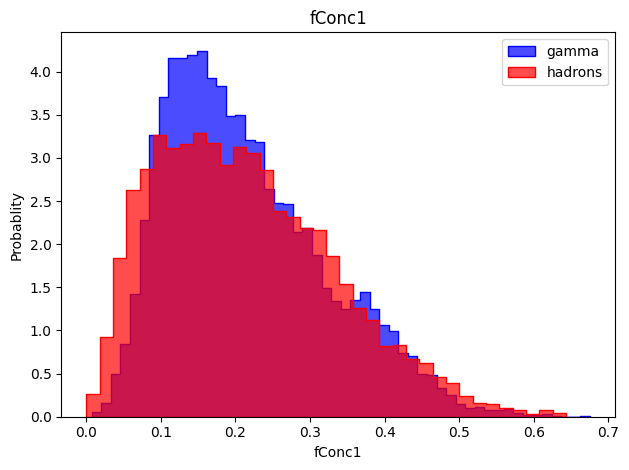

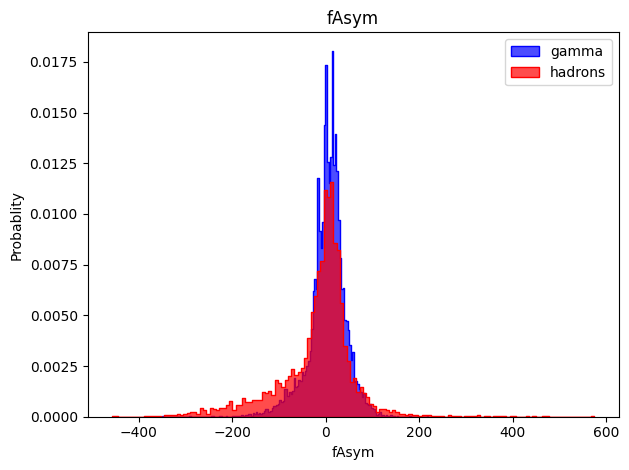

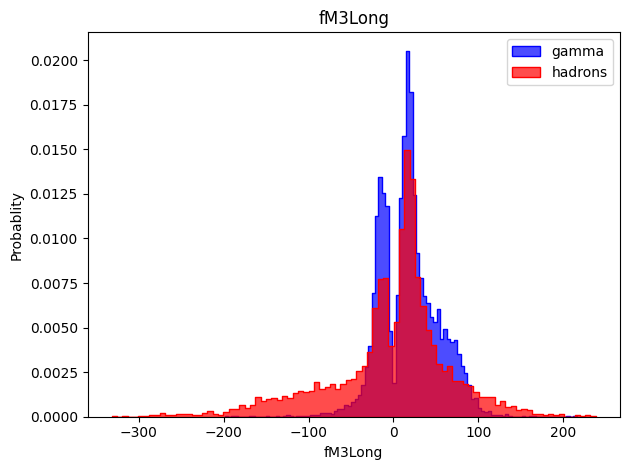

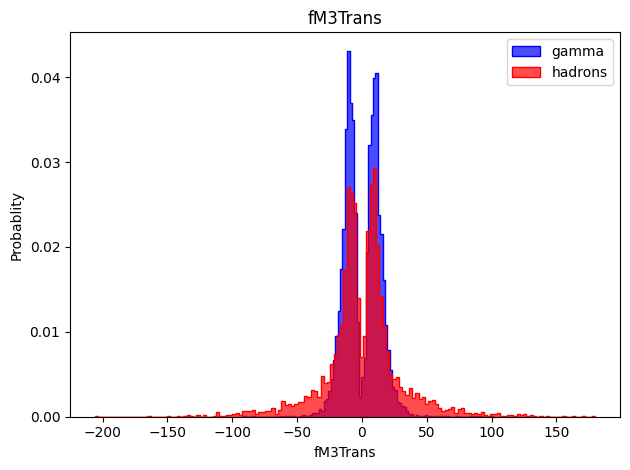

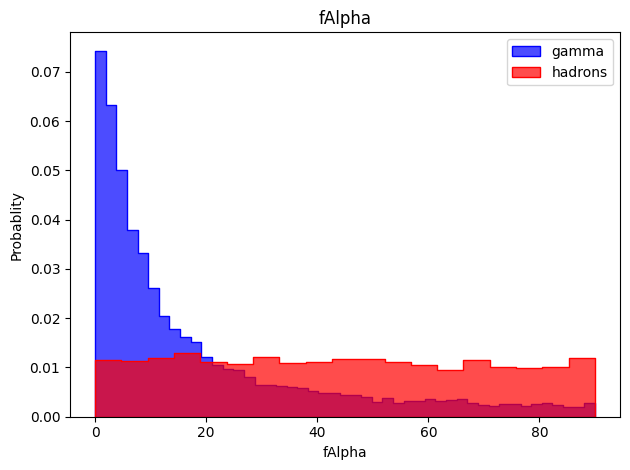

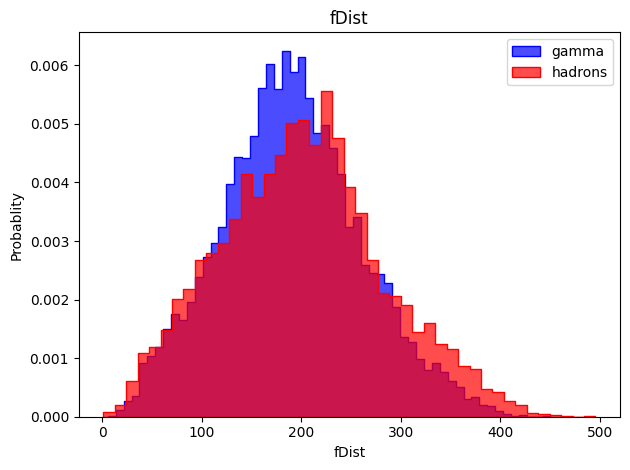

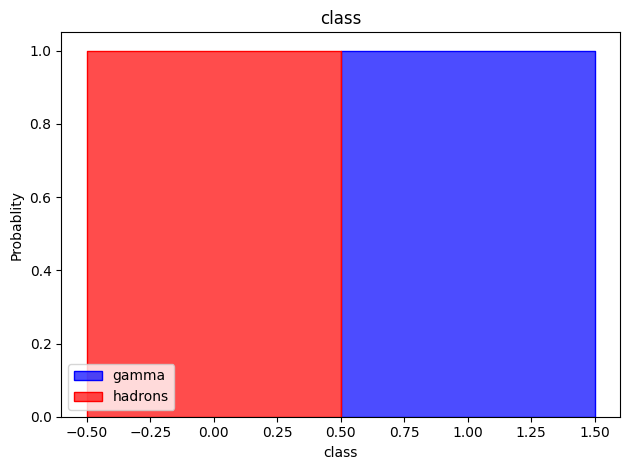

In [9]:
# distribution of label 
for feature in list(df.columns):
    sns.histplot(df[df["class"] == 1][feature], color="blue", label="gamma", alpha=0.7, stat="density", element="step")
    sns.histplot(df[df["class"] == 0][feature], color="red", label="hadrons", alpha=0.7, stat="density", element = "step")
    plt.title(feature)
    plt.ylabel("Probablity")
    plt.xlabel(feature)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [10]:
# Train , Validation , Test  datasets 
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
train.shape , valid.shape , test.shape 

((11412, 11), (3804, 11), (3804, 11))

In [12]:
# scaling data 
def scale_dataset(dataframe) : 
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [13]:
train_data, X_train, y_train = scale_dataset(train)
valid_data, X_valid, y_valid = scale_dataset(valid)
test_data, X_test, y_test = scale_dataset(test)

## kNN 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train , y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn_model.predict(X_test)
print( classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1348
           1       0.83      0.94      0.88      2456

    accuracy                           0.83      3804
   macro avg       0.84      0.79      0.80      3804
weighted avg       0.83      0.83      0.83      3804



### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [43]:
nb_model = GaussianNB()
nb_model.fit(X_train , y_train)

GaussianNB()

In [45]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.71      0.39      0.50      1348
           1       0.73      0.91      0.81      2456

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression 


In [46]:
lr_model = LogisticRegression()
lr_model.fit(X_train , y_train)

LogisticRegression()

In [47]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1348
           1       0.80      0.90      0.85      2456

    accuracy                           0.79      3804
   macro avg       0.78      0.75      0.76      3804
weighted avg       0.79      0.79      0.79      3804



### Support Vector Machines

In [38]:
from sklearn.svm import SVC 

In [49]:
svm_model = SVC()
svm_model.fit(X_train , y_train)

SVC()

In [50]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1348
           1       0.86      0.95      0.90      2456

    accuracy                           0.87      3804
   macro avg       0.87      0.83      0.85      3804
weighted avg       0.87      0.87      0.86      3804



### Neural Networks

In [26]:
import tensorflow as tf

In [27]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [28]:
def train_model(X_train , y_train , num_nodes , dropout_prob , lr , batch_size  , epochs):

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes , activation = "relu" , input_shape = (10 ,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes , activation = "relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1 , activation = "sigmoid")
    ])
    
    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr)  , loss = "binary_crossentropy" , metrics = ["accuracy"])
    history = nn_model.fit(X_train , y_train , epochs = epochs , batch_size =  batch_size , validation_split = 0.2  , verbose = 0 )
    
    return nn_model , history

num nodes : 16 , dropout 0 , lr 0.01 , batch_size 32 


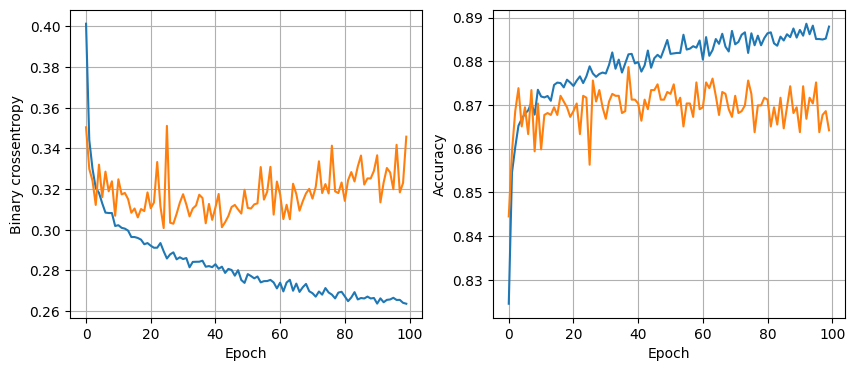

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8697 - loss: 0.4041
num nodes : 16 , dropout 0 , lr 0.01 , batch_size 64 


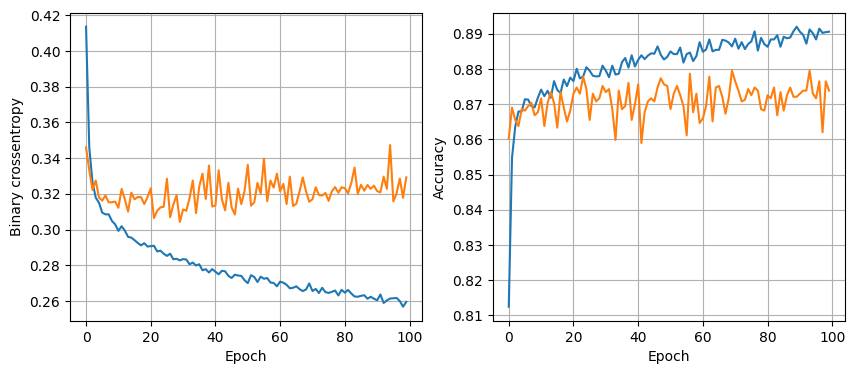

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8753 - loss: 0.3652
num nodes : 16 , dropout 0 , lr 0.01 , batch_size 128 


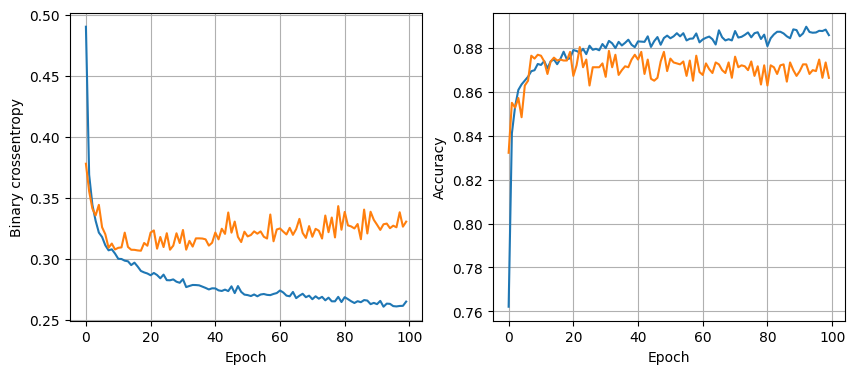

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.3378
num nodes : 16 , dropout 0 , lr 0.005 , batch_size 32 


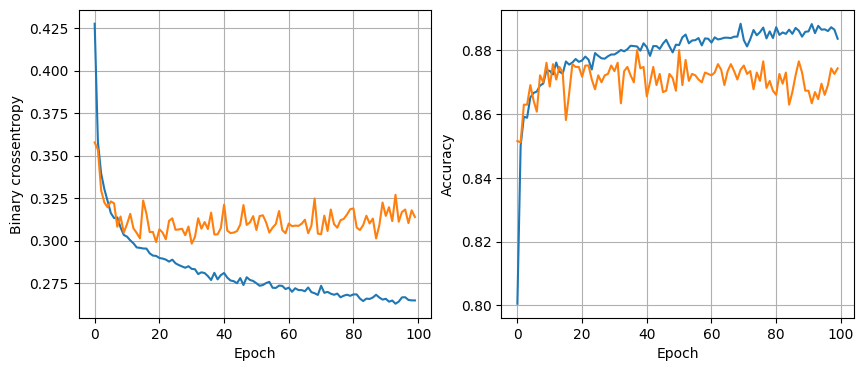

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8687 - loss: 0.3666
num nodes : 16 , dropout 0 , lr 0.005 , batch_size 64 


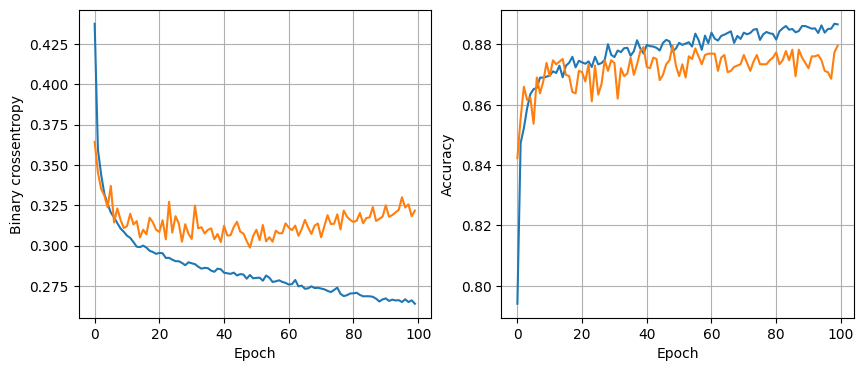

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.8678 - loss: 0.3353
num nodes : 16 , dropout 0 , lr 0.005 , batch_size 128 


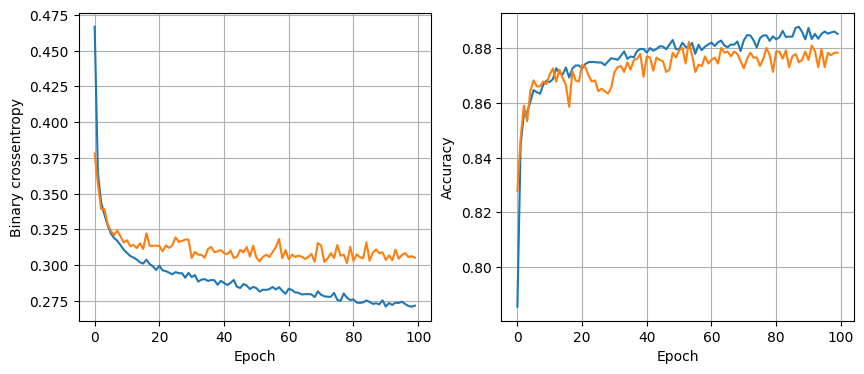

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8792 - loss: 0.3152
num nodes : 16 , dropout 0 , lr 0.001 , batch_size 32 


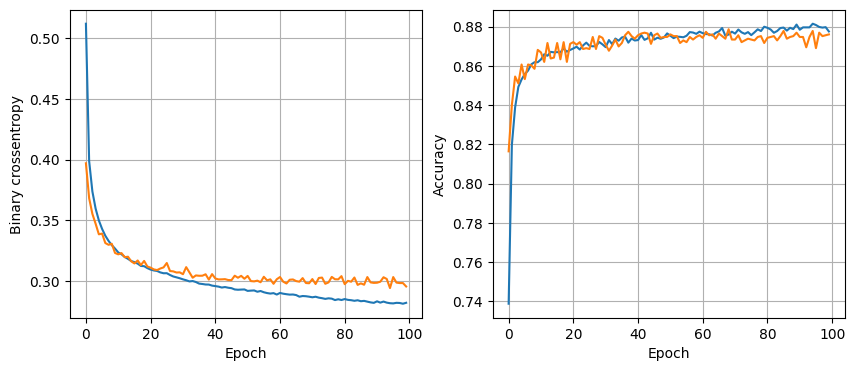

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8709 - loss: 0.3230
num nodes : 16 , dropout 0 , lr 0.001 , batch_size 64 


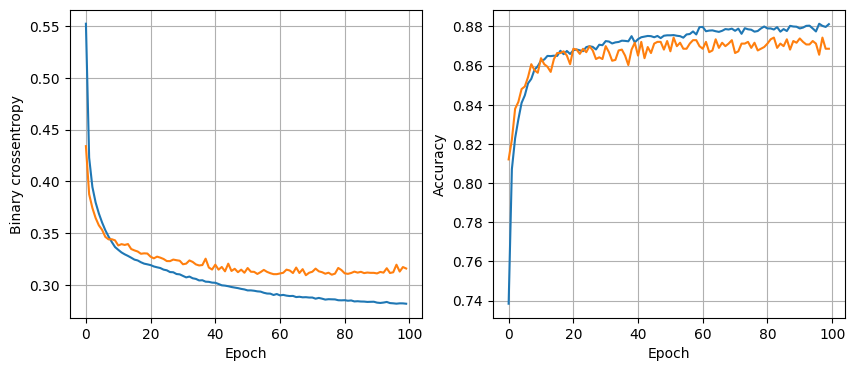

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.8733 - loss: 0.3255
num nodes : 16 , dropout 0 , lr 0.001 , batch_size 128 


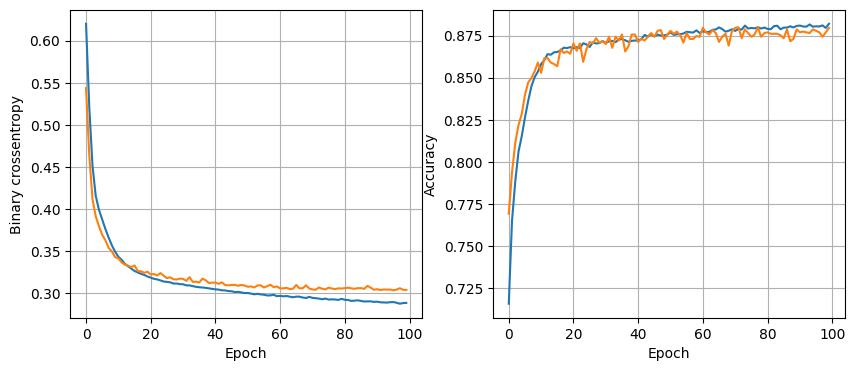

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8716 - loss: 0.3310
num nodes : 16 , dropout 0.2 , lr 0.01 , batch_size 32 


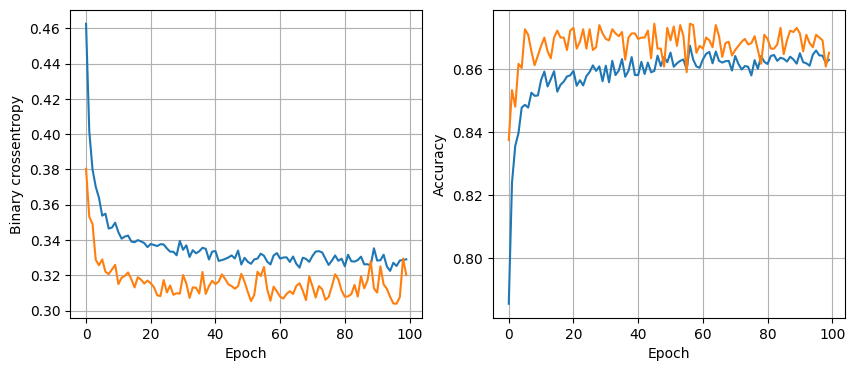

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8624 - loss: 0.3449
num nodes : 16 , dropout 0.2 , lr 0.01 , batch_size 64 


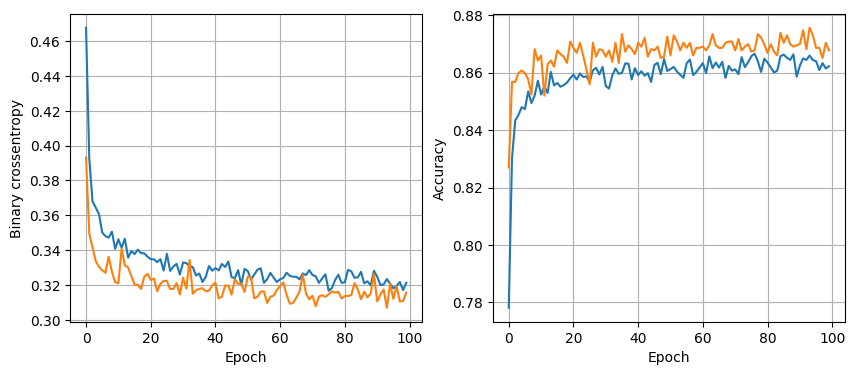

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8709 - loss: 0.3382
num nodes : 16 , dropout 0.2 , lr 0.01 , batch_size 128 


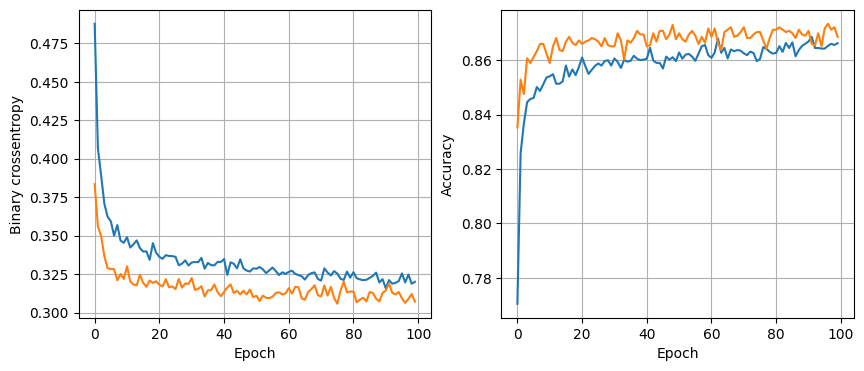

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.8705 - loss: 0.3211
num nodes : 16 , dropout 0.2 , lr 0.005 , batch_size 32 


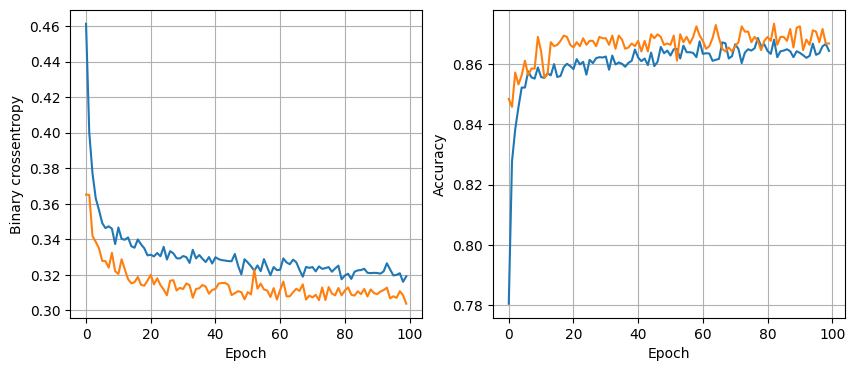

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.8672 - loss: 0.3319
num nodes : 16 , dropout 0.2 , lr 0.005 , batch_size 64 


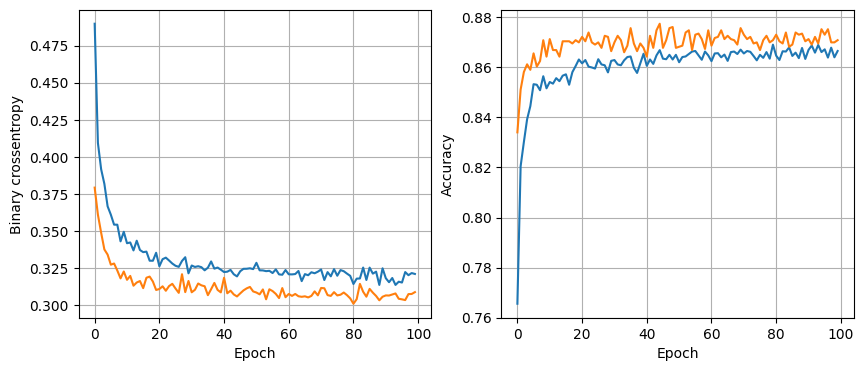

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8673 - loss: 0.3296
num nodes : 16 , dropout 0.2 , lr 0.005 , batch_size 128 


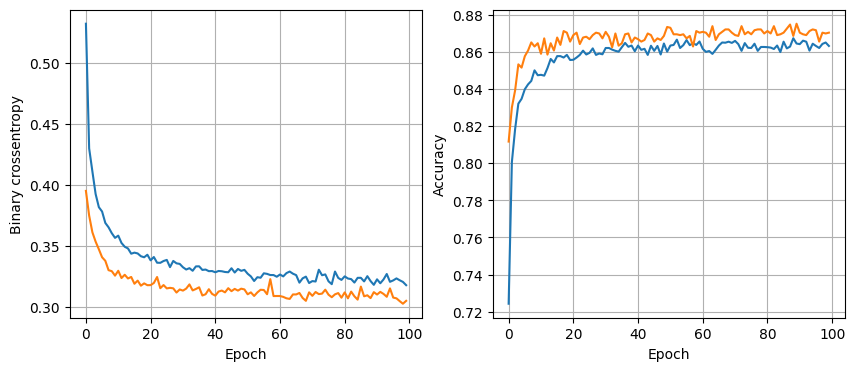

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8671 - loss: 0.3260
num nodes : 16 , dropout 0.2 , lr 0.001 , batch_size 32 


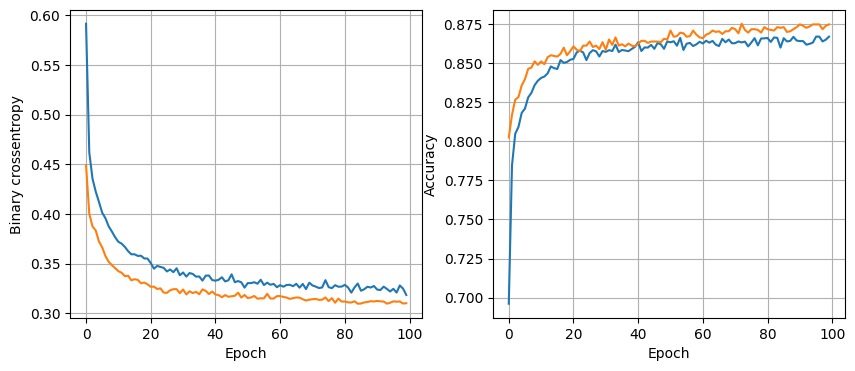

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8709 - loss: 0.3315
num nodes : 16 , dropout 0.2 , lr 0.001 , batch_size 64 


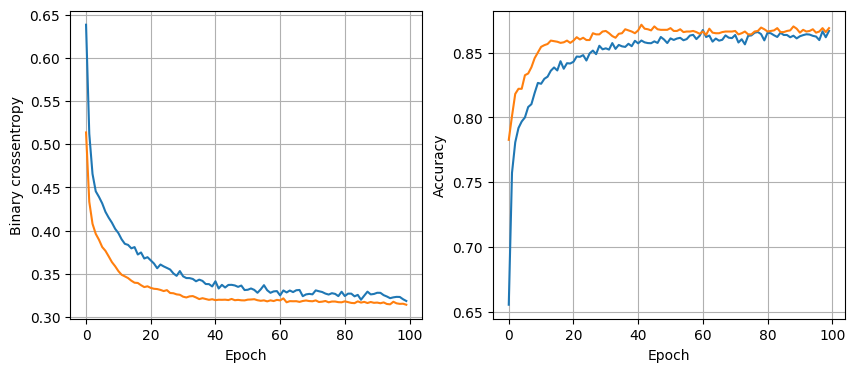

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.3309
num nodes : 16 , dropout 0.2 , lr 0.001 , batch_size 128 


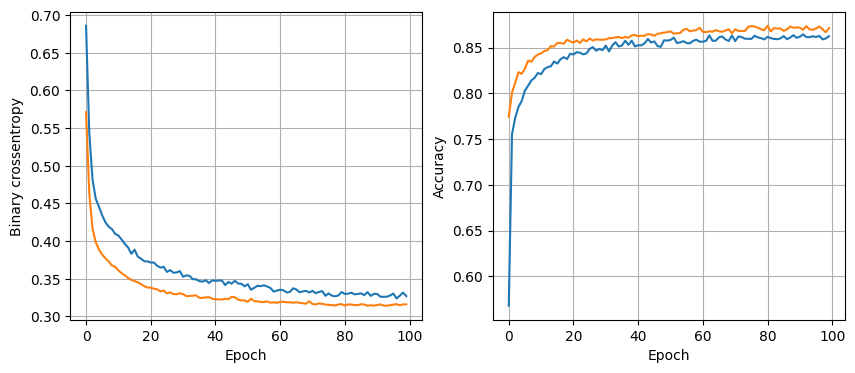

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.3374
num nodes : 32 , dropout 0 , lr 0.01 , batch_size 32 


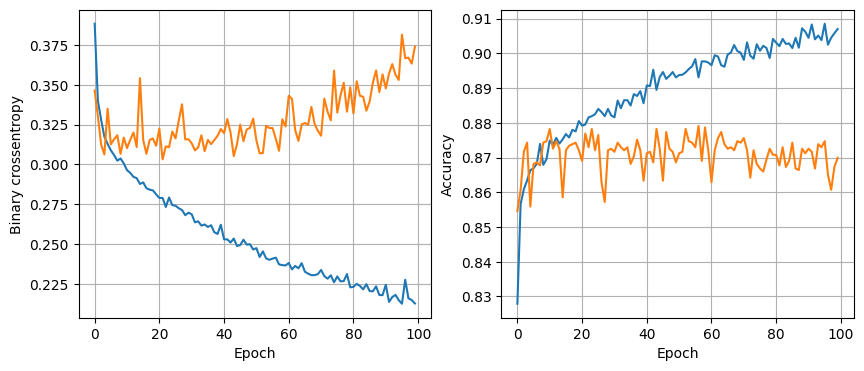

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8640 - loss: 0.5059
num nodes : 32 , dropout 0 , lr 0.01 , batch_size 64 


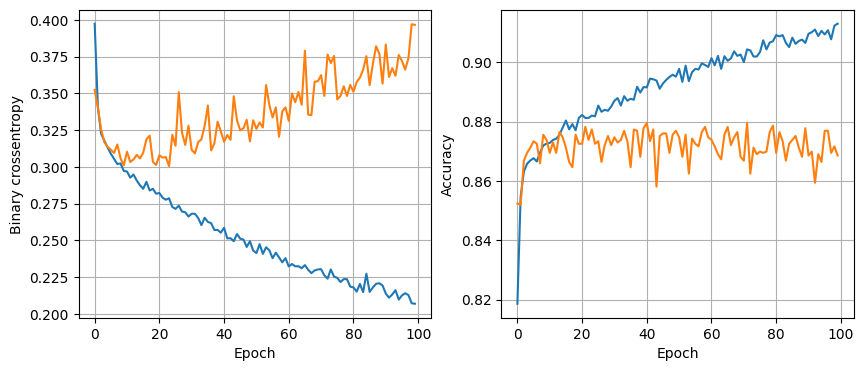

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8734 - loss: 0.4500  
num nodes : 32 , dropout 0 , lr 0.01 , batch_size 128 


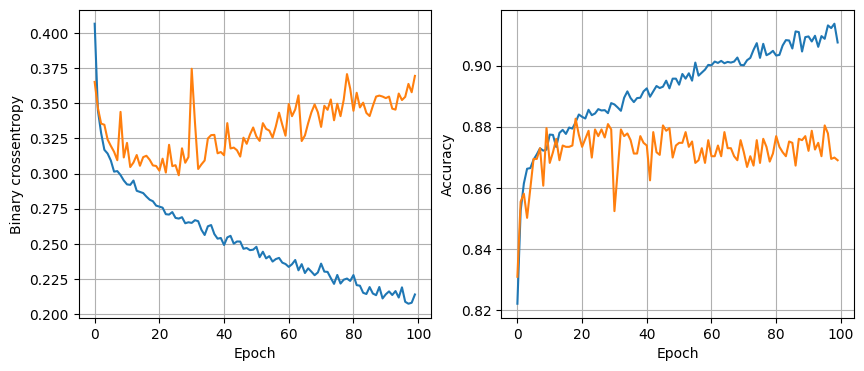

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.4704  
num nodes : 32 , dropout 0 , lr 0.005 , batch_size 32 


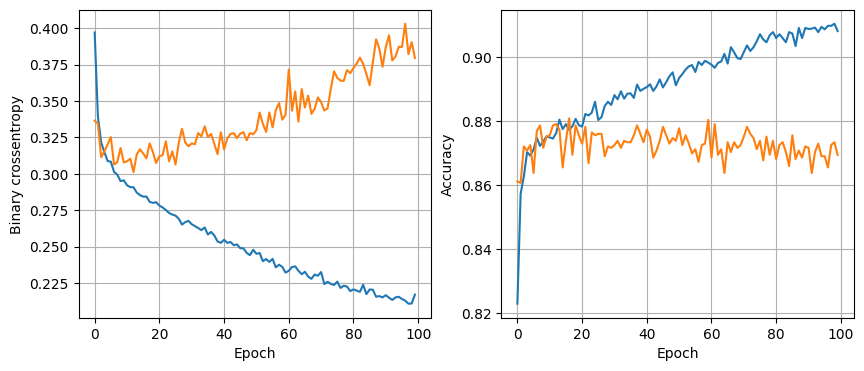

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.8668 - loss: 0.4653
num nodes : 32 , dropout 0 , lr 0.005 , batch_size 64 


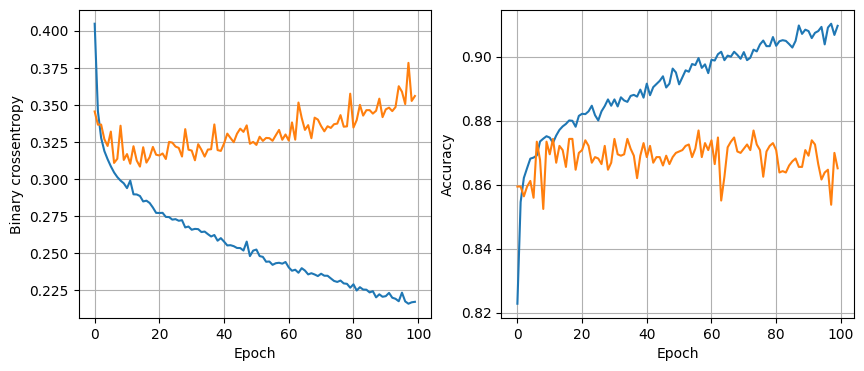

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8653 - loss: 0.3945
num nodes : 32 , dropout 0 , lr 0.005 , batch_size 128 


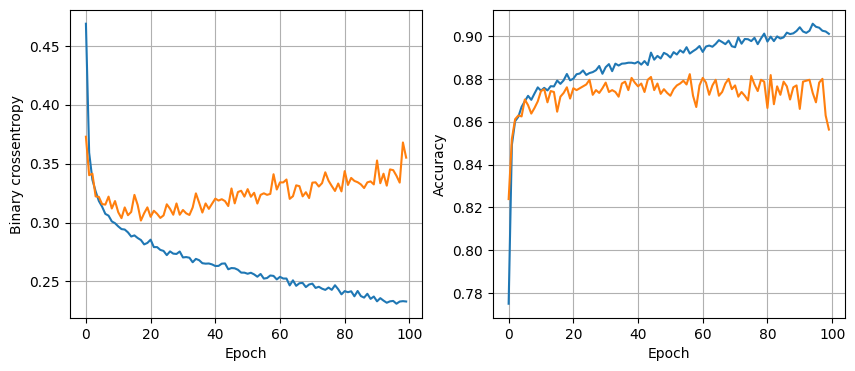

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8631 - loss: 0.4022
num nodes : 32 , dropout 0 , lr 0.001 , batch_size 32 


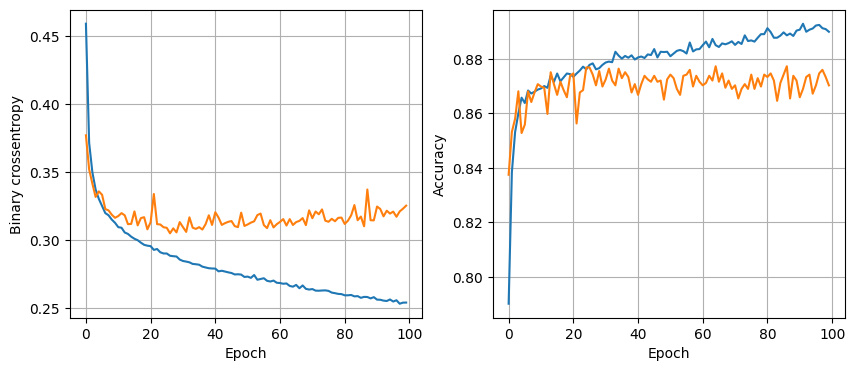

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8693 - loss: 0.3404
num nodes : 32 , dropout 0 , lr 0.001 , batch_size 64 


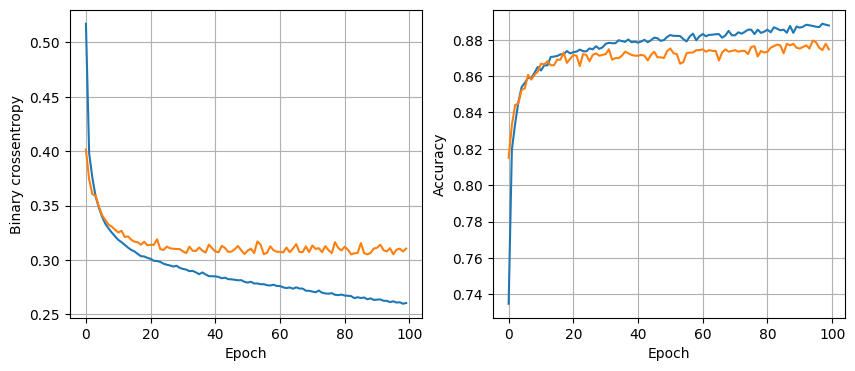

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3245
num nodes : 32 , dropout 0 , lr 0.001 , batch_size 128 


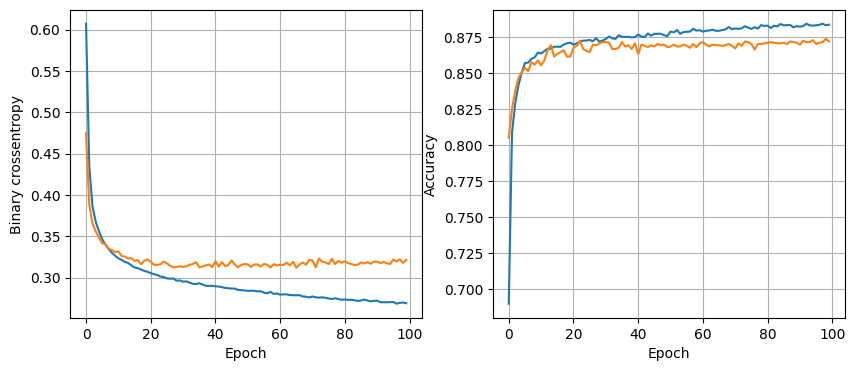

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.3344
num nodes : 32 , dropout 0.2 , lr 0.01 , batch_size 32 


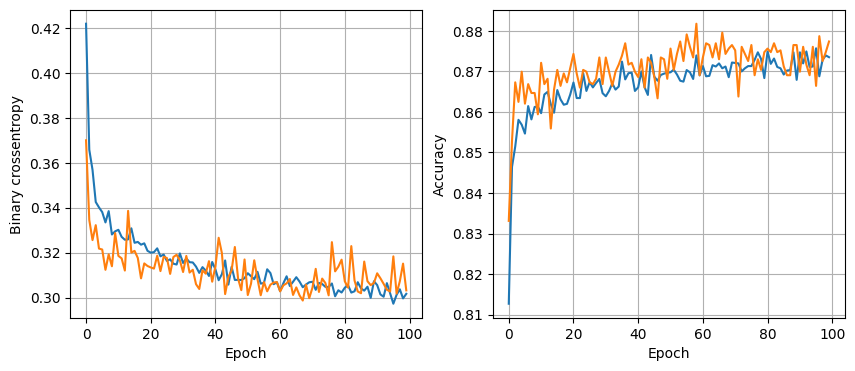

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8724 - loss: 0.3239
num nodes : 32 , dropout 0.2 , lr 0.01 , batch_size 64 


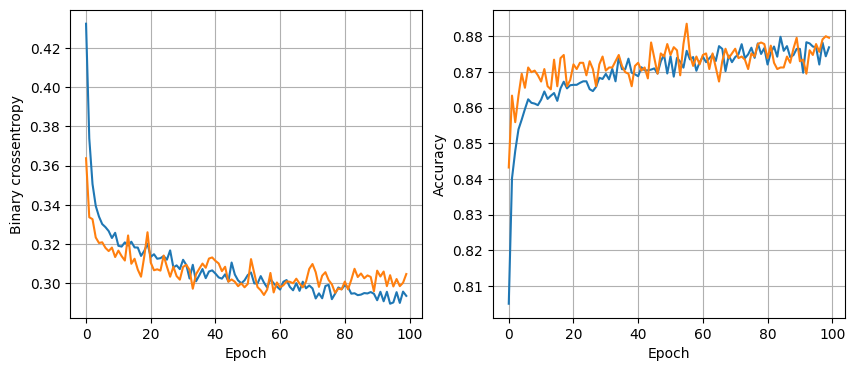

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8718 - loss: 0.3454
num nodes : 32 , dropout 0.2 , lr 0.01 , batch_size 128 


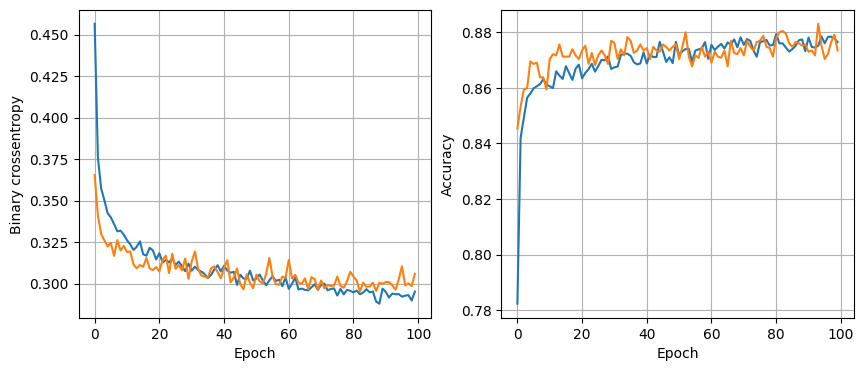

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8773 - loss: 0.3413
num nodes : 32 , dropout 0.2 , lr 0.005 , batch_size 32 


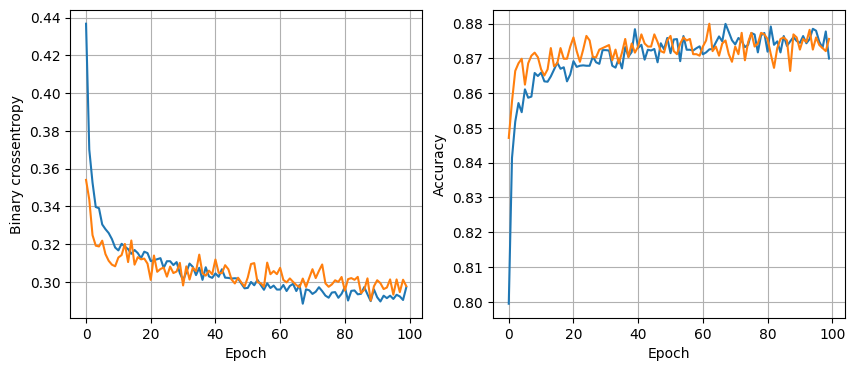

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.3223
num nodes : 32 , dropout 0.2 , lr 0.005 , batch_size 64 


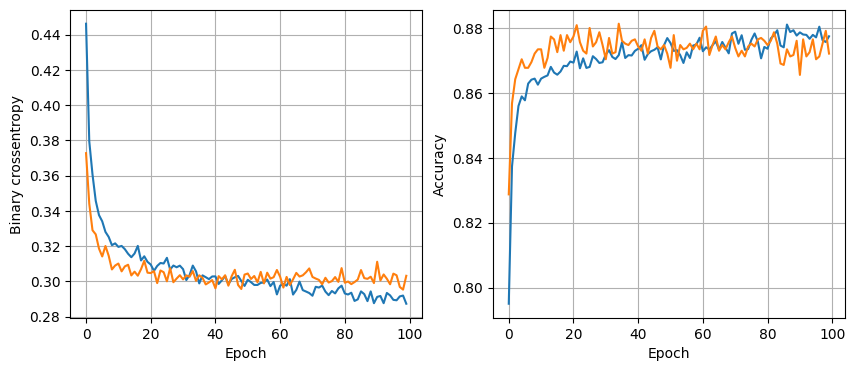

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8714 - loss: 0.3261
num nodes : 32 , dropout 0.2 , lr 0.005 , batch_size 128 


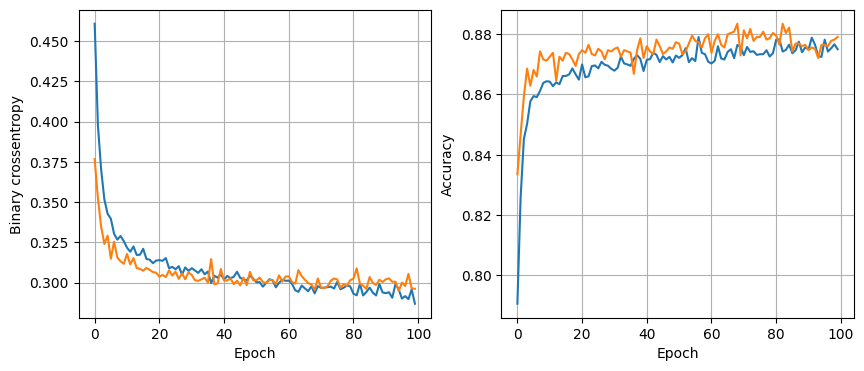

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8727 - loss: 0.3062
num nodes : 32 , dropout 0.2 , lr 0.001 , batch_size 32 


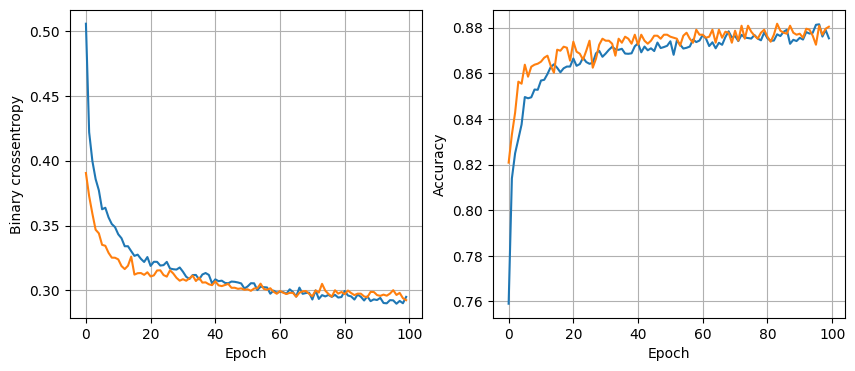

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8745 - loss: 0.3088
num nodes : 32 , dropout 0.2 , lr 0.001 , batch_size 64 


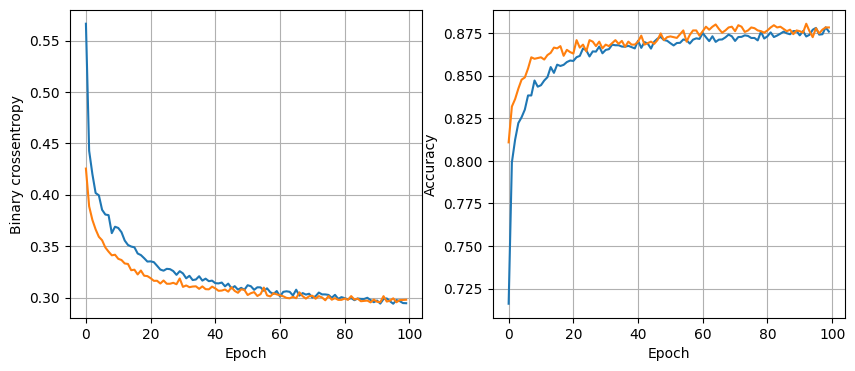

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8667 - loss: 0.3143
num nodes : 32 , dropout 0.2 , lr 0.001 , batch_size 128 


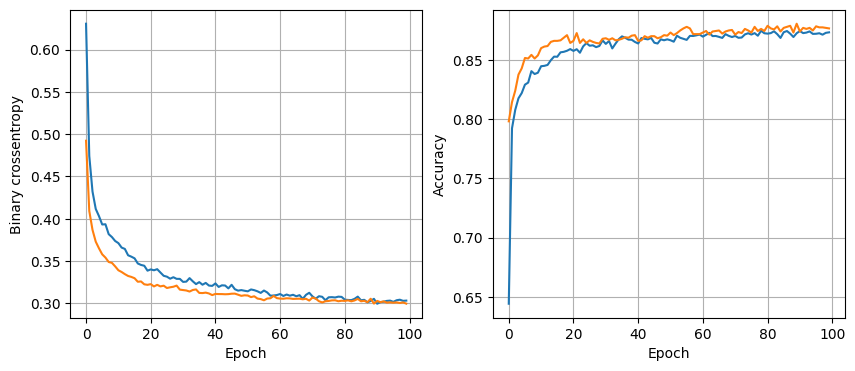

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8657 - loss: 0.3231
num nodes : 64 , dropout 0 , lr 0.01 , batch_size 32 


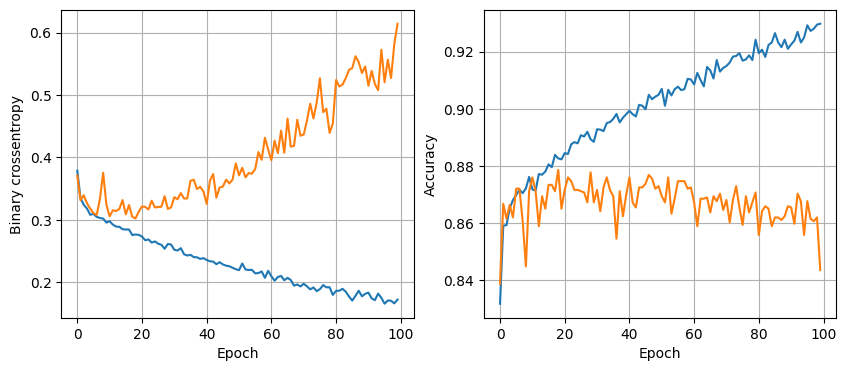

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8452 - loss: 0.8873
num nodes : 64 , dropout 0 , lr 0.01 , batch_size 64 


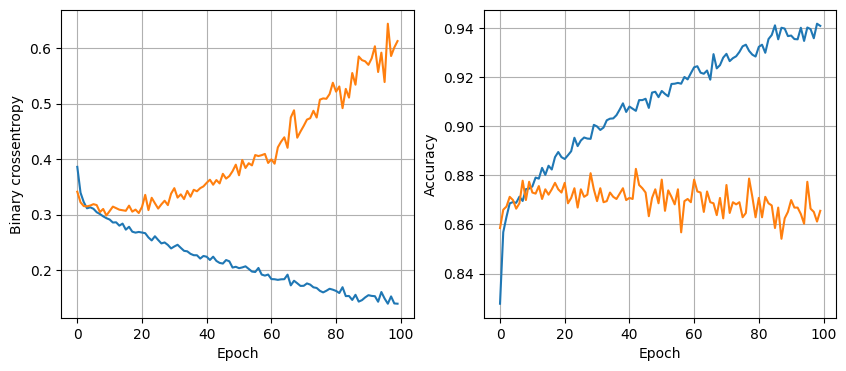

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8660 - loss: 0.8226
num nodes : 64 , dropout 0 , lr 0.01 , batch_size 128 


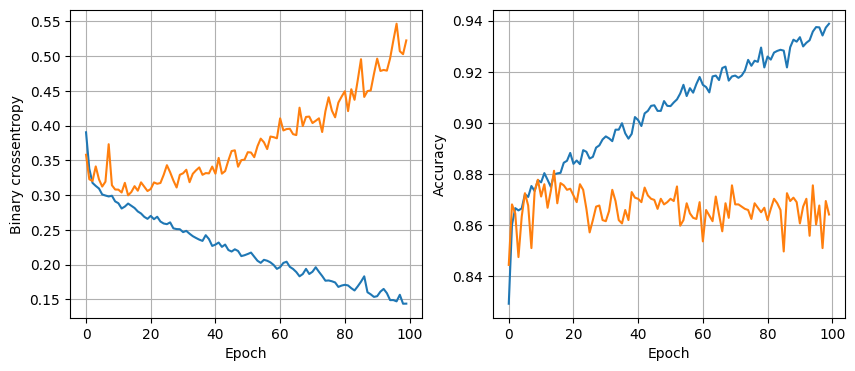

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8682 - loss: 0.7078
num nodes : 64 , dropout 0 , lr 0.005 , batch_size 32 


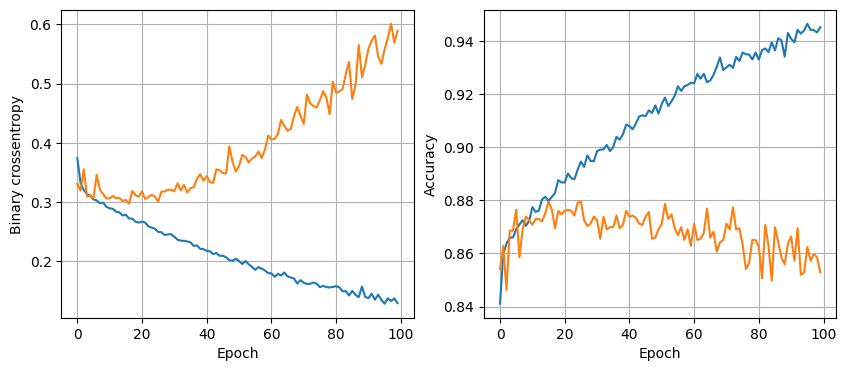

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8471 - loss: 0.8323
num nodes : 64 , dropout 0 , lr 0.005 , batch_size 64 


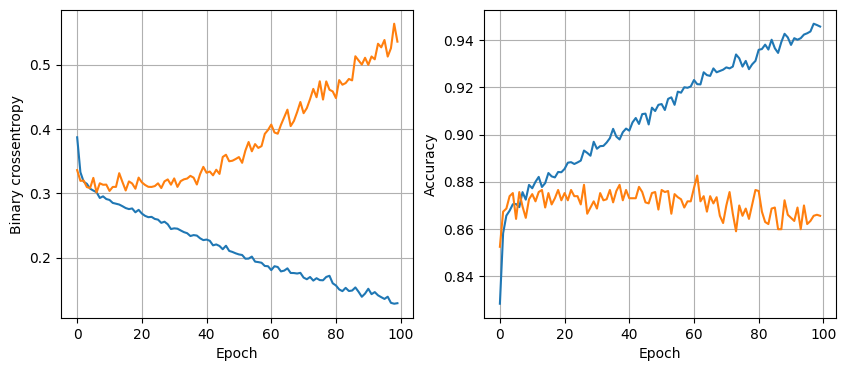

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8675 - loss: 0.7431
num nodes : 64 , dropout 0 , lr 0.005 , batch_size 128 


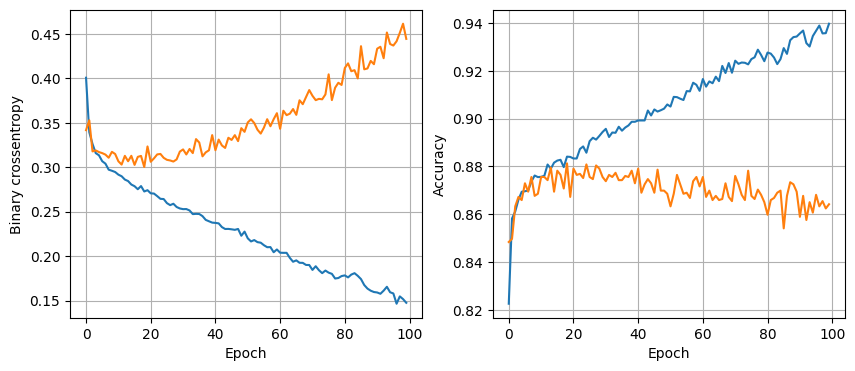

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.8659 - loss: 0.5747
num nodes : 64 , dropout 0 , lr 0.001 , batch_size 32 


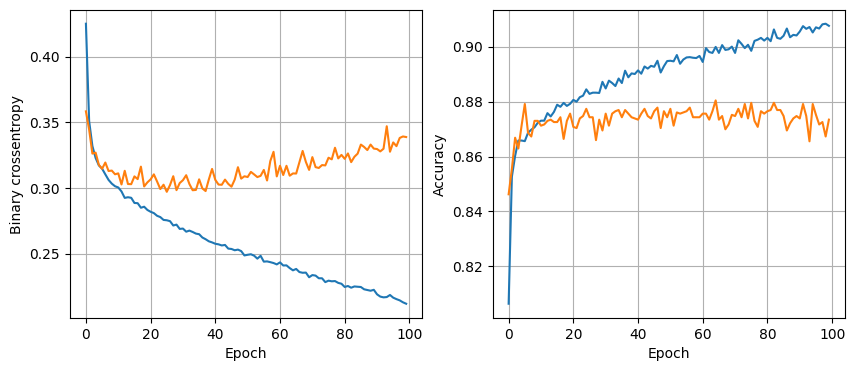

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8713 - loss: 0.3752
num nodes : 64 , dropout 0 , lr 0.001 , batch_size 64 


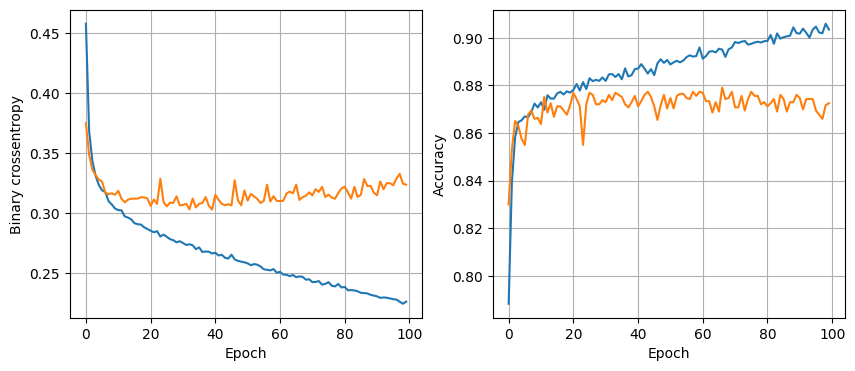

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8717 - loss: 0.3503
num nodes : 64 , dropout 0 , lr 0.001 , batch_size 128 


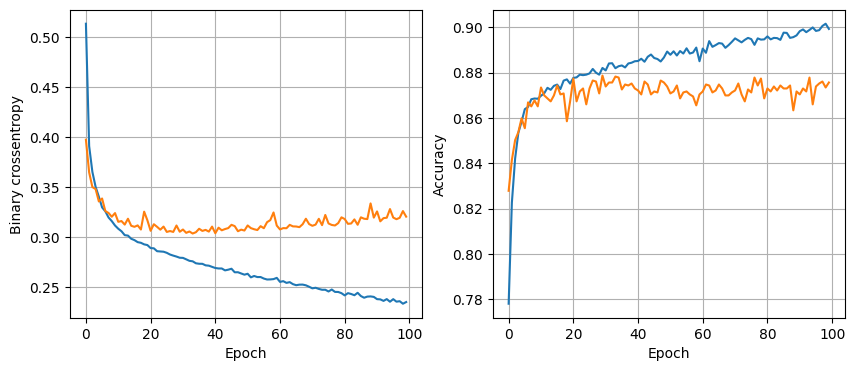

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8696 - loss: 0.3302
num nodes : 64 , dropout 0.2 , lr 0.01 , batch_size 32 


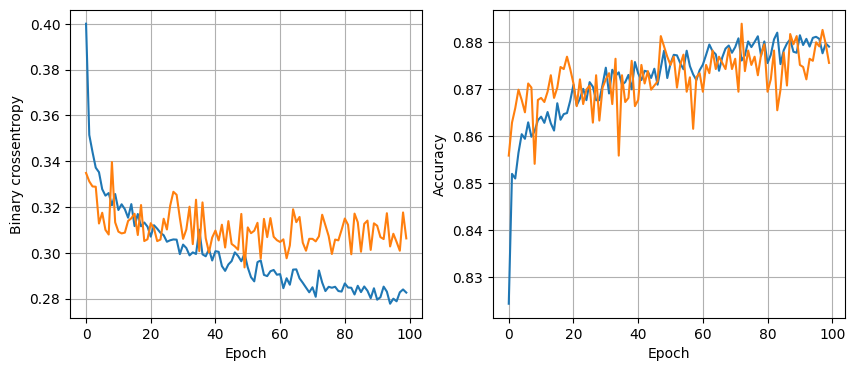

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8648 - loss: 0.3614
num nodes : 64 , dropout 0.2 , lr 0.01 , batch_size 64 


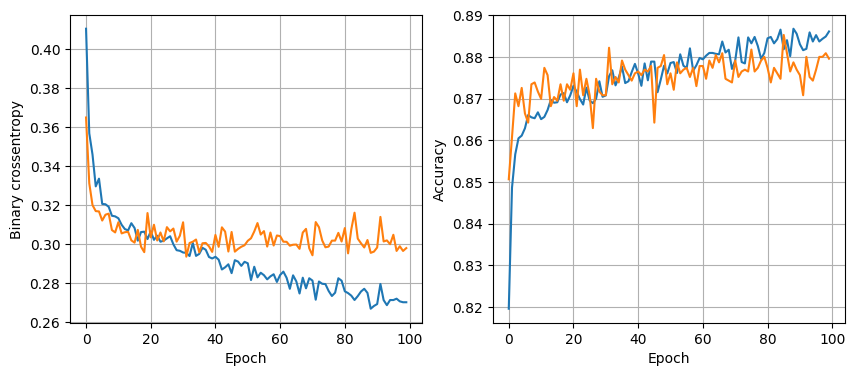

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.8754 - loss: 0.3224
num nodes : 64 , dropout 0.2 , lr 0.01 , batch_size 128 


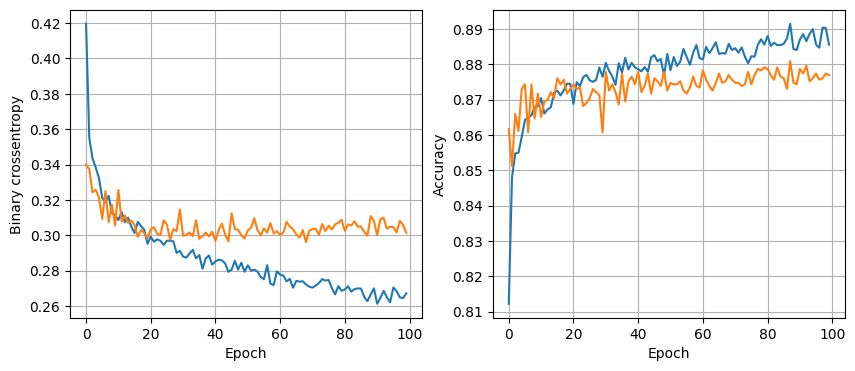

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8779 - loss: 0.3224
num nodes : 64 , dropout 0.2 , lr 0.005 , batch_size 32 


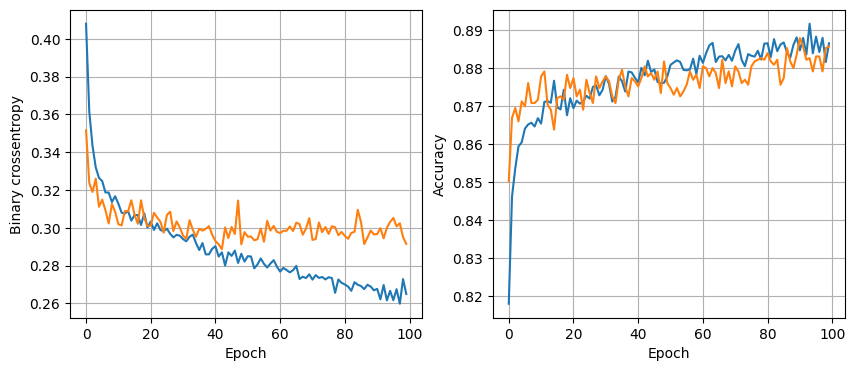

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8767 - loss: 0.3364  
num nodes : 64 , dropout 0.2 , lr 0.005 , batch_size 64 


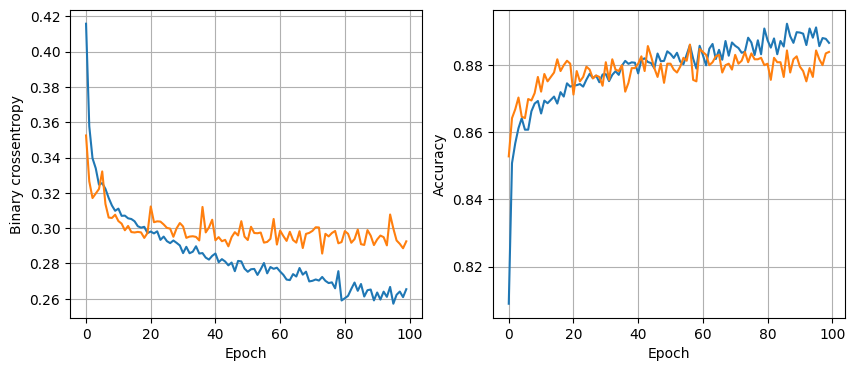

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8770 - loss: 0.3282
num nodes : 64 , dropout 0.2 , lr 0.005 , batch_size 128 


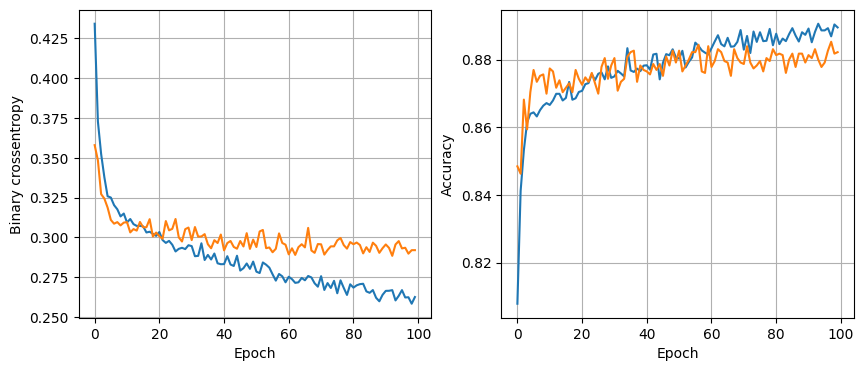

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8833 - loss: 0.3205
num nodes : 64 , dropout 0.2 , lr 0.001 , batch_size 32 


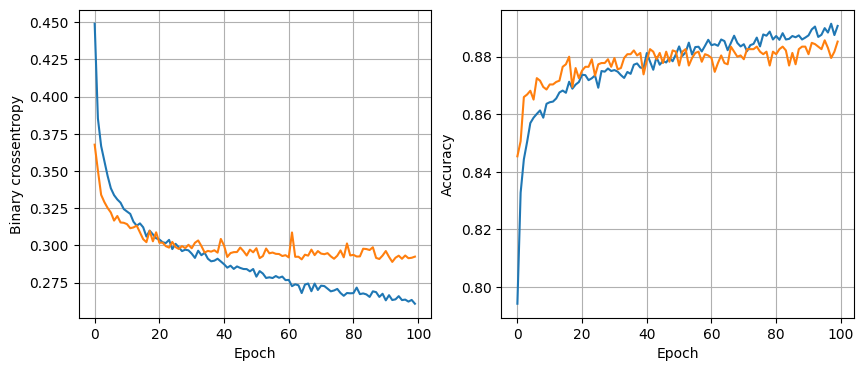

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8821 - loss: 0.3043
num nodes : 64 , dropout 0.2 , lr 0.001 , batch_size 64 


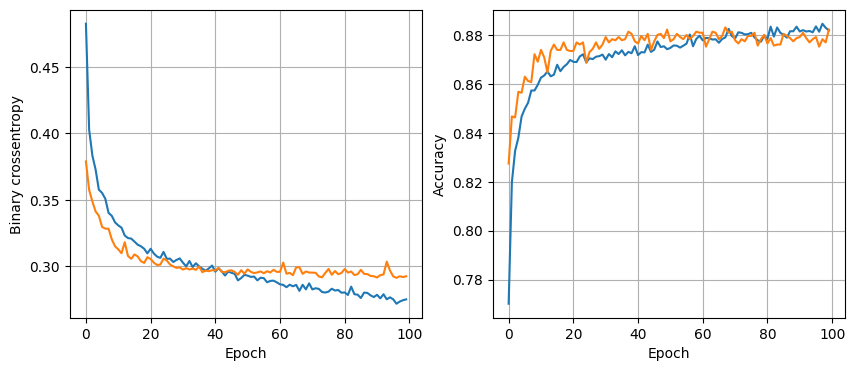

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.3027
num nodes : 64 , dropout 0.2 , lr 0.001 , batch_size 128 


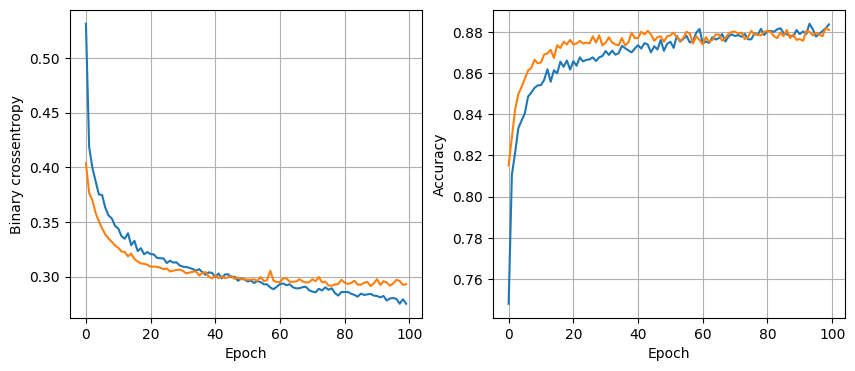

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8738 - loss: 0.3163


In [29]:
least_val_loss = float("inf")
least_loss_mode = None 
epochs = 100 
for num_nodes in [ 16 , 32 , 64 ]:
    for dropout_prob in [0 , 0.2 ]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32 , 64 , 128]:
                print(f"num nodes : {num_nodes} , dropout {dropout_prob} , lr {lr} , batch_size {batch_size} ")
                model , history = train_model(X_train , y_train , num_nodes , dropout_prob , lr , batch_size , epochs)
                plot_history(history)
                valid_loss = model.evaluate(X_valid , y_valid)[0]
                if valid_loss < least_val_loss : 
                    least_val_loss = valid_loss
                    least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


In [35]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1348
           1       0.86      0.95      0.91      2456

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

